In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as pyplot


spyData= pd.read_csv('C:/Users/Ben/iCloudDrive/EclipseWorkspace/NewResearch/TrendTrading/ProbModel/Data/SPY.csv')
spyData= spyData['Price'].values.tolist()
spy_dta= pd.Series(spyData, index=pd.date_range('1996-04-09', '2006-02-05', freq='M'))
mod_spy = sm.tsa.MarkovAutoregression(spy_dta, k_regimes=2, order=4, switching_ar=False)
res_spy = mod_spy.fit()

print(res_spy.summary(), "\n")
print(res_spy.expected_durations, "\n")

print(mod_spy.initial_probabilities(mod_spy.start_params), "\n")

print(mod_spy.predict(mod_spy.start_params), "\n")

print(mod_spy.regime_transition_matrix(mod_spy.transform_params(mod_spy.start_params)))

                         Markov Switching Model Results                         
Dep. Variable:                        y   No. Observations:                  114
Model:             MarkovAutoregression   Log Likelihood                -293.490
Date:                  Tue, 16 Oct 2018   AIC                            604.979
Time:                          00:43:53   BIC                            629.605
Sample:                      04-30-1996   HQIC                           614.974
                           - 01-31-2006                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.0959     19.470      3.754      0.000      34.936     111.256
                             Regime 

In [3]:
print(mod_spy.score(mod_spy.start_params))

[ 3.66285346e-03 -1.90354696e-01  2.56081052e-01 -1.10379715e-02
  8.08198331e-01  9.09002465e+02  9.04061177e+02  8.99109776e+02
  8.94007495e+02]


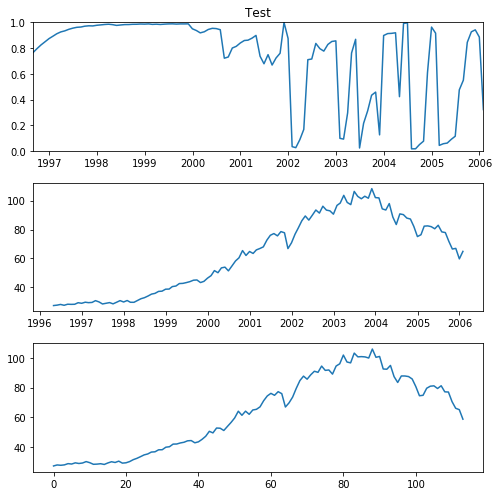

In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, figsize=(7,7))
ax = axes[0]
ax.plot(res_spy.filtered_marginal_probabilities[0])

ax.set(xlim=(spy_dta.index[4], spy_dta.index[-1]), ylim=(0, 1),
       title='Test')
fig.tight_layout()

ax=axes[1]
ax.plot(spy_dta)

ax=axes[2]
ax.plot(mod_spy.predict(mod_spy.start_params))

In [5]:
print(mod_spy.start_params)

[ 0.5         0.5         0.          0.70366645 11.11266558  0.9103138
  0.02683451  0.16281469 -0.11701729]
